In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('C:/Users/Acer/JUPYTER/Assignments/4.Simple Linear Regression/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
data=data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [4]:
data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

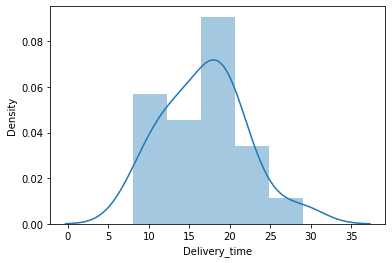

In [5]:
sns.distplot(data['Delivery_time'])

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

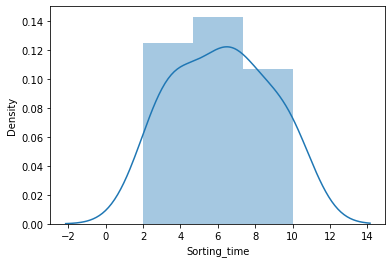

In [6]:
sns.distplot(data['Sorting_time'])

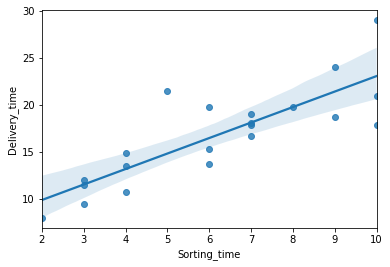

In [7]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=data);

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data = data).fit()

In [9]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [10]:
model.tvalues, model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [11]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [12]:
newdata=pd.Series([2,3,4,5,8])
newdata

0    2
1    3
2    4
3    5
4    8
dtype: int64

In [13]:
data_pred=pd.DataFrame(data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [14]:
model.predict(data_pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [15]:
newdata=pd.Series([5,8,10,20,30])
newdata

0     5
1     8
2    10
3    20
4    30
dtype: int64

In [16]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,8
2,10
3,20
4,30


In [17]:
model.predict(data_pred)

0    14.827833
1    19.774893
2    23.072933
3    39.563132
4    56.053331
dtype: float64